<a href="https://colab.research.google.com/github/rodrigo8502/projeto5/blob/main/game_sales3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Descrição do Problema
O problema central é entender o panorama das vendas de videogames em um nível global e regional, analisando como diferentes variáveis como gênero, plataforma, ano de lançamento e editora influenciam o sucesso de vendas. Queremos descobrir padrões, identificar os jogos de maior sucesso e as características comuns a eles, e observar a evolução do mercado de games ao longo dos anos.

Além disso, este estudo visa preparar os dados para a futura construção de um modelo capaz de prever o número de vendas na Europa (EU_Sales) com base nas características dos jogos, o que pode auxiliar em decisões estratégicas para lançamentos futuros neste mercado.

## Hipóteses do Problema

- Jogos de gêneros populares tendem a ter vendas mais altas em nível global e regional?

- Plataformas com maior base de usuários podem ter jogos com vendas acumuladas mais expressivas?

- Determinadas editoras (publishers) possuem um histórico de maior sucesso e volume de vendas?

- As vendas variam significativamente entre as regiões (América do Norte, Europa, Japão e Outros)?

- A indústria de videogames tem crescido e mudado ao longo dos anos, e essa evolução se refletiu no padrão de vendas?

## Tipo de Problema

Com base no objetivo final de prever EU_Sales, este é um problema de aprendizado supervisionado. Mais especificamente, é um problema de regressão, pois a variável que se busca prever (EU_Sales) é um valor numérico contínuo. Meu objetivo inicial neste MVP é a análise exploratória e o pré-processamento de dados para essa finalidade, compreendendo a estrutura e as características dos dados antes de construir um modelo preditivo.

## Seleção de Dados
O dataset "Video Game Sales" foi escolhido a partir da plataforma Kaggle e por oferecer uma diversidade de atributos que permitem uma análise aprofundada das tendências do mercado de videogames.

## Atributos do Dataset

Rank: Classificação geral das vendas.

Name: Nome do jogo.

Platform: Plataforma na qual o jogo foi lançado

Year: Ano de lançamento do jogo.

Genre: Gênero do jogo

Publisher: Editora do jogo.

NA_Sales: Vendas na América do Norte (em milhões de unidades).

EU_Sales: Vendas na Europa (em milhões de unidades).

JP_Sales: Vendas no Japão (em milhões de unidades).

Other_Sales: Vendas em outras regiões (em milhões de unidades).

Global_Sales: Vendas totais em todo o mundo (em milhões de unidades).

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold



## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/vgsales.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##Análise de Dados
Na etapa de Análise de Dados Exploratória, o objetivo é entender a distribuição, as relações e as características das variáveis do dataset de vendas de videogames, o que é crucial para as etapas subsequentes de pré-processamento e, futuramente, modelagem preditiva.


Primeiramente, inspecionei o tamanho do dataset e os tipos de dados de cada coluna para identificar potenciais problemas ou necessidades de conversão.
O dataset possui 16598 instâncias e 11 atributos. Observa-se que a coluna Year é do tipo float64, o que pode indicar a presença de valores ausentes ou a necessidade de conversão para int após o tratamento. As colunas de vendas (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales) são numéricas (float64), como esperado. Rank é int64. As colunas Name, Platform, Genre e Publisher são do tipo object (strings), indicando que são categóricas e precisarão de tratamento para serem usadas em modelos.

In [ ]:
# Mostra as dimensões do dataset (linhas, colunas)
print(f"Total de instâncias (linhas): {dataset.shape[0]}")
print(f"Total de atributos (colunas): {dataset.shape[1]}")

print("\nTipos de dados por coluna:")
print(dataset.info())



Total de instâncias (linhas): 16598
Total de atributos (colunas): 11

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [ ]:
dataset.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
dataset.shape

(16598, 11)

In [ ]:
# Filtrando o jogo com o nome 'Mario Kart Wii'
jogo_desejado = dataset[dataset['Name'] == 'Mario Kart Wii']
print(jogo_desejado)

   Rank            Name Platform    Year   Genre Publisher  NA_Sales  \
2     3  Mario Kart Wii      Wii  2008.0  Racing  Nintendo     15.85   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
2     12.88      3.79         3.31         35.82  


In [ ]:
# Filtrando jogos do gênero de esporte
jogos_de_esporte = dataset[dataset['Genre'] == 'Sports']
print(jogos_de_esporte)

        Rank                           Name Platform    Year   Genre  \
0          1                     Wii Sports      Wii  2006.0  Sports   
3          4              Wii Sports Resort      Wii  2009.0  Sports   
13        14                        Wii Fit      Wii  2007.0  Sports   
14        15                   Wii Fit Plus      Wii  2009.0  Sports   
77        78                        FIFA 16      PS4  2015.0  Sports   
...      ...                            ...      ...     ...     ...   
16576  16579              Rugby Challenge 3     XOne  2016.0  Sports   
16578  16581  Outdoors Unleashed: Africa 3D      3DS  2011.0  Sports   
16579  16582              PGA European Tour      N64  2000.0  Sports   
16581  16584                      Fit & Fun      Wii  2011.0  Sports   
16587  16590       Mezase!! Tsuri Master DS       DS  2009.0  Sports   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                  Nintendo     41.49     29.02      3.77    

## Estatísticas Descritivas
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis. Isso ajuda a entender a distribuição e a variabilidade das vendas.

In [ ]:
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000







O resumo estatístico revela que as colunas de vendas (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales) têm valores mínimos de 0 e vendas baixas em 25% e 50%, indicando que muitos jogos não tiveram vendas expressivas nessas regiões. Os valores máximos são muito altos (ex: Global_Sales com 82.74 milhões) e mostram uma grande diferença em relação à 75% da venda dos jogos, o que sugere a presença de outliers, jogos com vendas extremamente altas que podem influenciar a média. A média é significativamente maior que a mediana para as vendas, o que confirma a distribuição assimétrica e a presença desses outliers de alto valor. A coluna Rank também apresenta uma grande variação e a coluna Year tem um valor mínimo de 1980 e máximo de 2020, o que é um período razoável para a indústria de jogos.


## Média
A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. No contexto das vendas, a média nos dá uma ideia do desempenho médio das vendas dos jogos.

In [ ]:
# média dos atributos numéricos do dataset
print("\nMédia dos atributos numéricos:")
print(dataset.describe().loc['mean'])




Média dos atributos numéricos:
Rank            8300.605254
Year            2006.406443
NA_Sales           0.264667
EU_Sales           0.146652
JP_Sales           0.077782
Other_Sales        0.048063
Global_Sales       0.537441
Name: mean, dtype: float64


A média das vendas globais é de aproximadamente 0.53 milhões de unidades. Comparando as médias regionais, a América do Norte (NA_Sales) tem a maior média de vendas, seguida pela Europa (EU_Sales). Isso sugere que esses são os dois maiores mercados para a maioria dos jogos. A média é impactada pelos outliers, sendo mais alta do que a mediana em todos os casos de vendas, o que reforça a ideia de que poucos jogos de grande sucesso levam a média para cima.

## Desvio Padrão
 O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores em relação à média. Um desvio padrão alto em vendas sugere que há uma grande variação entre os jogos, com alguns vendendo muito e outros muito pouco.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
print("\nDesvio padrão dos atributos numéricos:")
print(dataset.describe().loc['std'])




Desvio padrão dos atributos numéricos:
Rank            4791.853933
Year               5.828981
NA_Sales           0.816683
EU_Sales           0.505351
JP_Sales           0.309291
Other_Sales        0.188588
Global_Sales       1.555028
Name: std, dtype: float64


O desvio padrão para todas as colunas de vendas é alto, especialmente para Global_Sales (1.55 milhões), NA_Sales (0.82 milhões) e EU_Sales (0.50 milhões). Isso indica uma alta dispersão dos dados de vendas, confirmando a presença de outliers e uma grande variabilidade no desempenho dos jogos. A maioria dos jogos tem vendas modestas, enquanto uma pequena parcela atinge volume de vendas muito elevado.

In [ ]:
print(dataset.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [ ]:
# Contando a quantidade de cada classe
value_counts = dataset['Global_Sales'].value_counts()

# Filtrando as classes com mais de 1 ocorrência
classes_to_keep = value_counts[value_counts > 1].index

# Filtrando o DataFrame para manter apenas as classes que aparecem mais de uma vez
dataset_filtered = dataset[dataset['Global_Sales'].isin(classes_to_keep)]

# Exibindo o DataFrame filtrado
print(dataset_filtered)


        Rank                                              Name Platform  \
30        31           Pokémon Yellow: Special Pikachu Edition       GB   
31        32                           Call of Duty: Black Ops     X360   
77        78                                           FIFA 16      PS4   
78        79                                         Wii Party      Wii   
79        80                                            Halo 2       XB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre               Publisher  NA_Sales  EU_Sales  \
30     1998.0  Role-Play

 O gráfico de barras horizontais mostra que os jogos da Nintendo têm um número considerável de vendas globais, estando a empresa presente em grande parte dos jogos mais vendidos e também representando uma quantidade relevante de vendas por região, conforme destaca o gráfico de barras empilhadas, que compara as vendas por região.






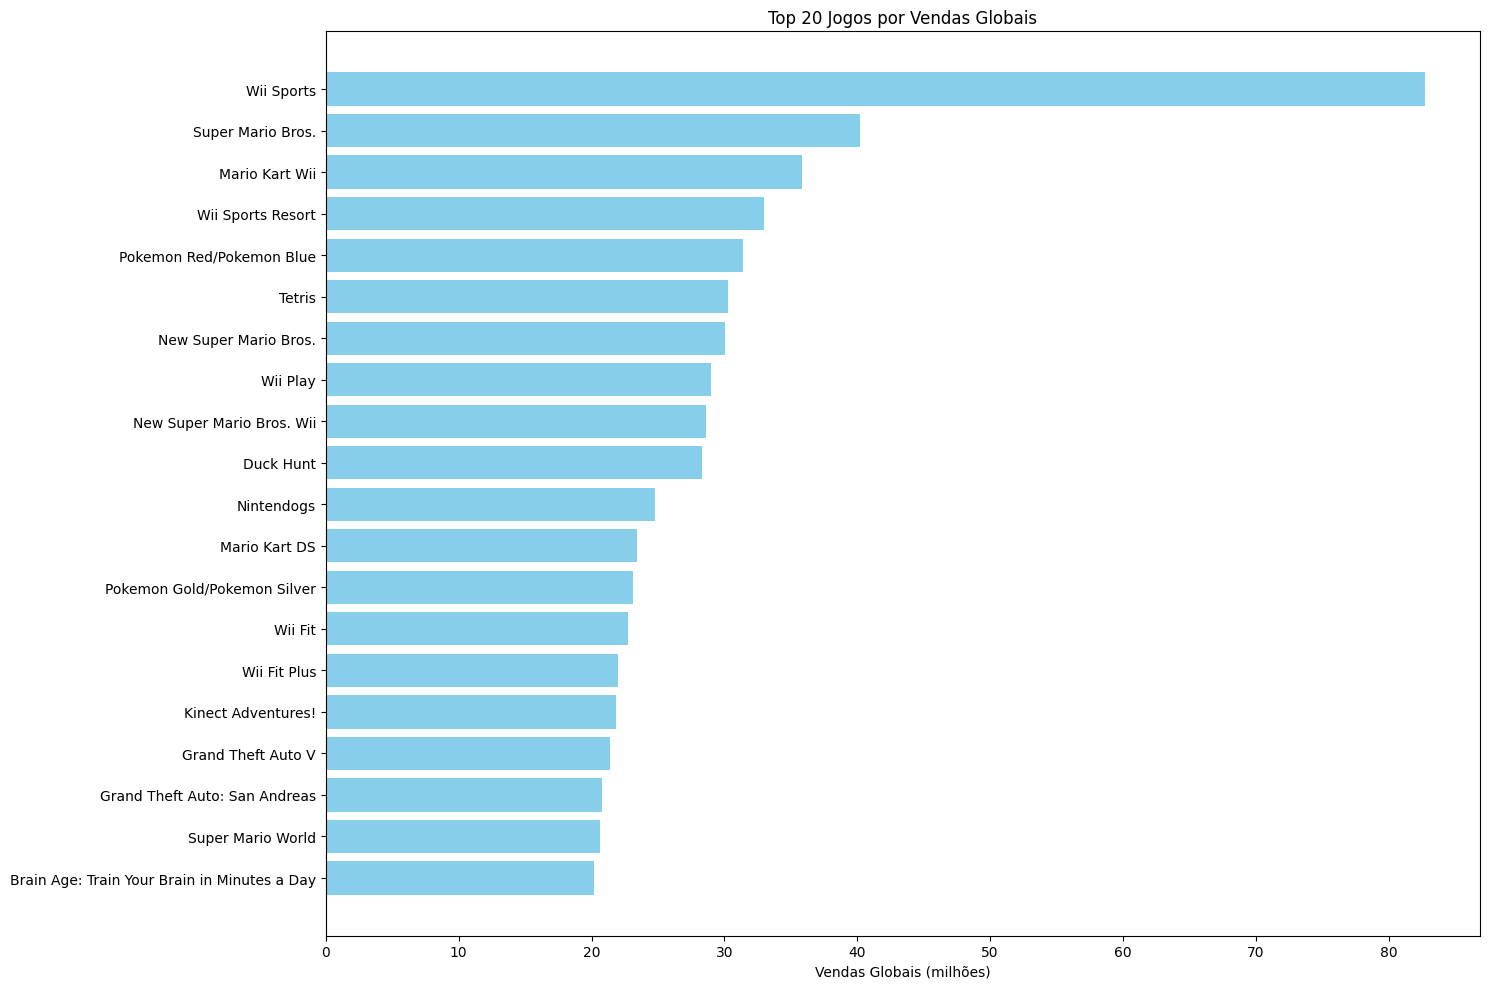

In [ ]:
# Top 20 jogos por vendas globais
top10_global = dataset.sort_values(by='Global_Sales', ascending=False).head(20)

plt.figure(figsize=(15, 10))
plt.barh(top10_global['Name'], top10_global['Global_Sales'], color='skyblue')
plt.xlabel('Vendas Globais (milhões)')
plt.title('Top 20 Jogos por Vendas Globais')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

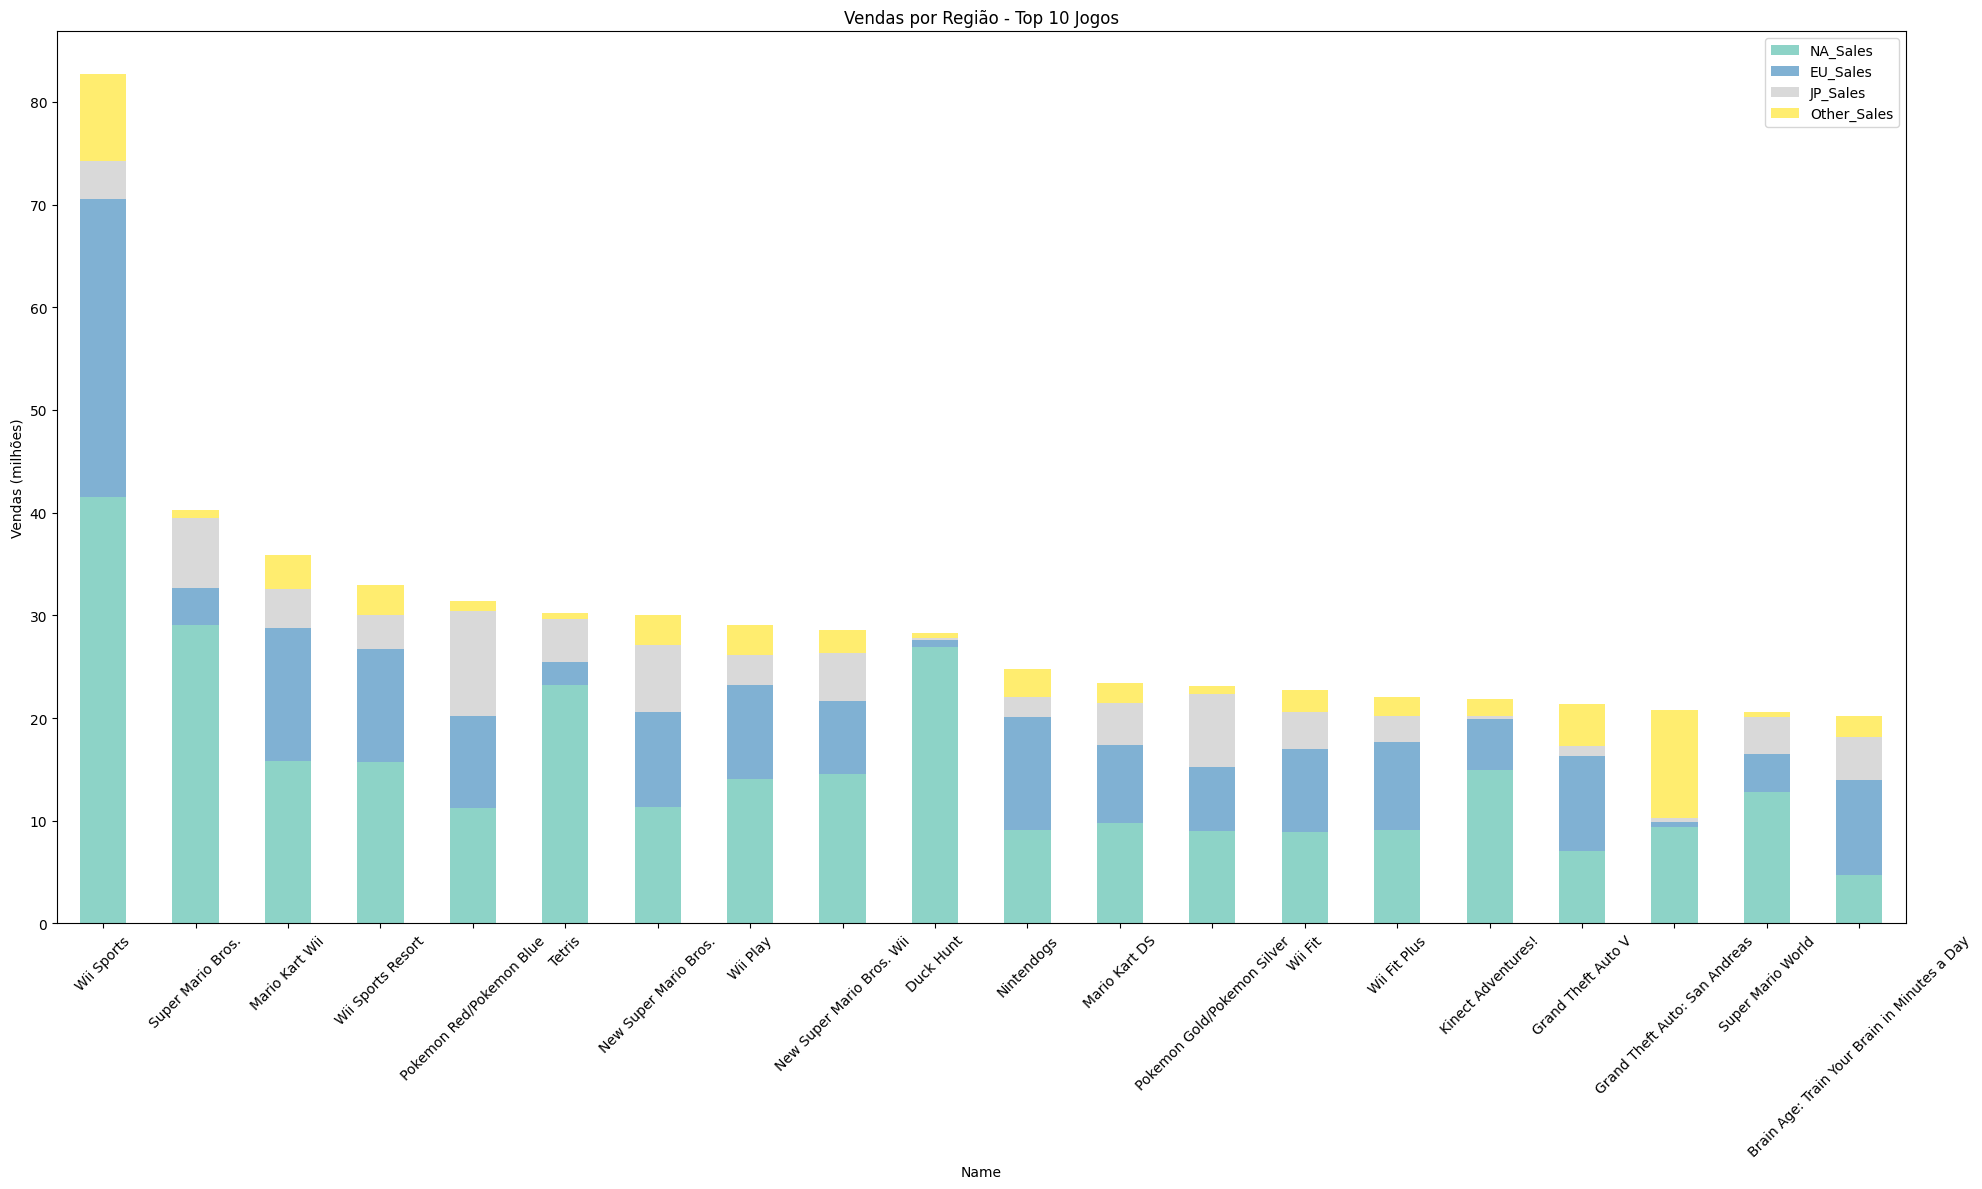

In [ ]:
# Comparação de vendas por região (stacked bar)
top10_regioes = top10_global[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top10_regioes.set_index('Name', inplace=True)
top10_regioes.plot(kind='bar', stacked=True, figsize=(20, 12), colormap='Set3')
plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Região - Top 10 Jogos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

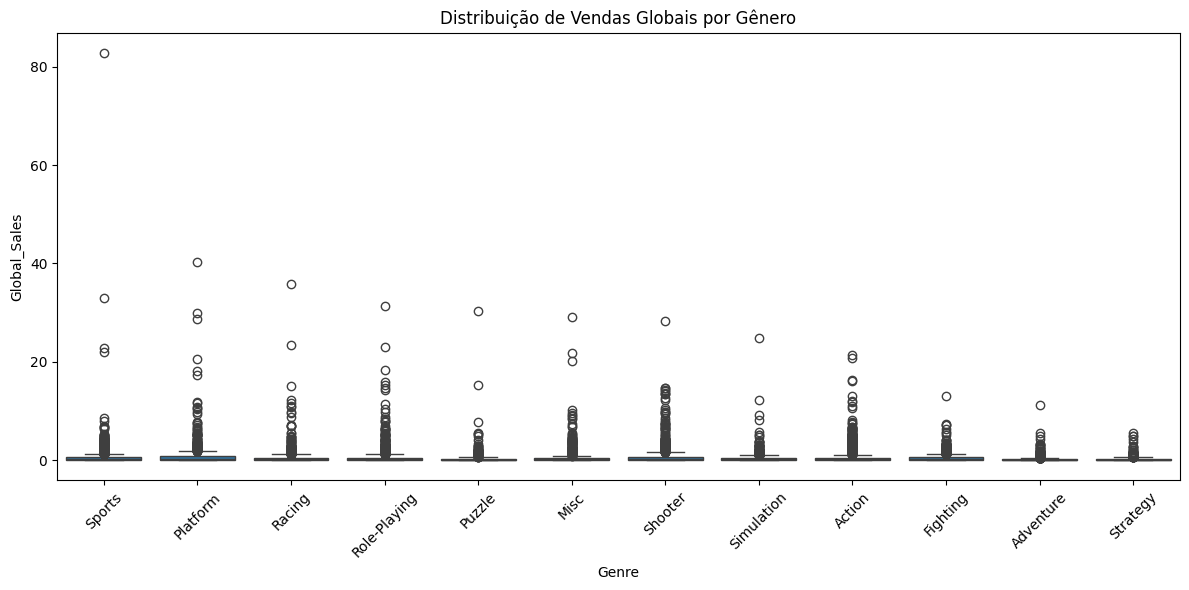

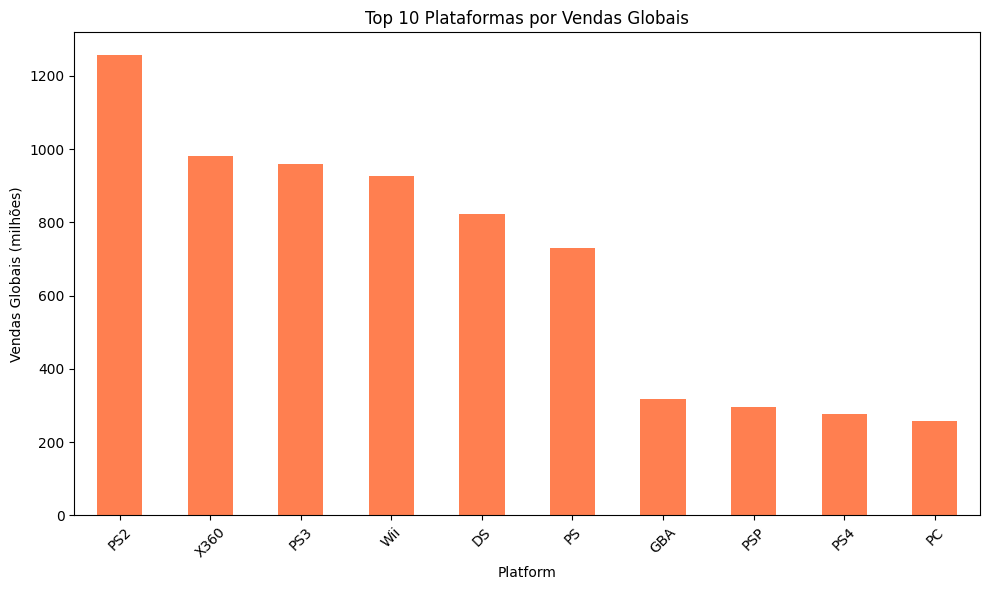

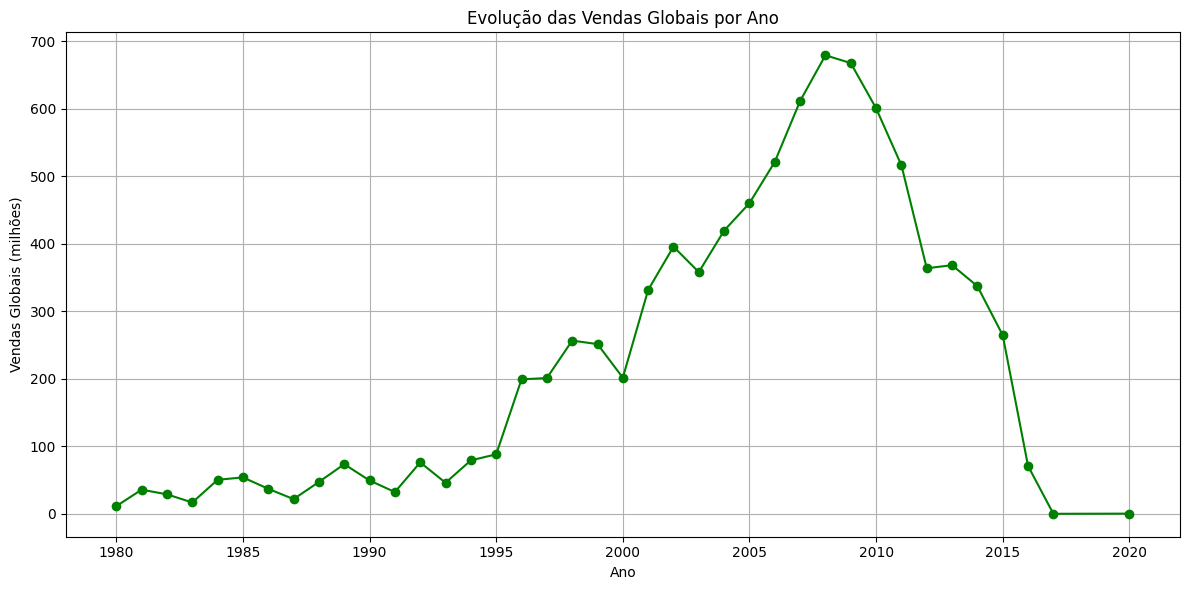

In [ ]:
# Boxplot de vendas globais por gênero
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=dataset)
plt.xticks(rotation=45)
plt.title('Distribuição de Vendas Globais por Gênero')
plt.tight_layout()
plt.show()

# Vendas globais por plataforma (Top 10 plataformas)
top_platforms = dataset.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', color='coral')
plt.ylabel('Vendas Globais (milhões)')
plt.title('Top 10 Plataformas por Vendas Globais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evolução das vendas ao longo dos anos
sales_by_year = dataset.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='green')
plt.title('Evolução das Vendas Globais por Ano')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico de linhas mostra que, a partir dos anos 2000, houve um aumento significativo no número de vendas globais por ano, mostrando um pico de venda globais por volta de 2008 e 2009 e depois tendo uma queda no número de vendas. A década de 2000 foi um contexto de grande concorrência entre Sony, Microsoft e Nintendo. O Playstation 2, lançado em 2000, se tornou o console mais vendido da história com 155 milhões de unidades comercializadas. Xbox 360, PS3 e Wii vem logo atrás com vendas consideráveis.Em 2001, a Microsoft entrou no mercado com o Xbox, e a Nintendo lançou o Gamecube.Mais tarde, em 2005 e 2006, a nova geração trouxe o Xbox 360, o Playstation 3 e o Wii, que revolucionou a forma de jogar com seus controles de movimento. O sucesso desses consoles, o surgimento de grandes franquias, a diversificação de gêneros e a popularização de jogos online influenciaram no aumento de vendas e foram determinantes para o período de grande sucesso na indústria de videogames.


Conforme destaca o gráfico Boxplot, Sports, Platform, Racing, Role-Playing e Shooter são os gêneros com os outliers mais proeminentes e com maior quantidade de vendas. Isso significa que, embora a maioria dos jogos nesses gêneros venda pouco, eles também têm alguns poucos jogos de grande sucesso que alcançaram vendas extremamente altas. O gênero "Sports" tem o outlier mais alto, perto de 80 milhões, e também outros outliers altos. Isso provavelmente inclui jogos como o "Wii Sports", que  vendeu muito. "Platform" e "Racing" também têm outliers bem altos, o que é esperado para jogos como "Super Mario Bros." e "Mario Kart".

As linhas da mediana para todos os gêneros estão muito perto de 0, reforçando que a maioria dos jogos 50% em cada gênero vende relativamente pouco. A verdadeira riqueza está nos poucos jogos que se tornam grandes sucessos (os outliers).
Em resumo, o gráfico de Boxplots mostra que o mercado de jogos é dominado por um grande volume de títulos com vendas modestas, mas que existem alguns "gigantes" (os outliers) em certos gêneros, especialmente Sports, Platform, Racing, Role-Playing e Shooter, que puxam as vendas globais para cima de forma significativa.

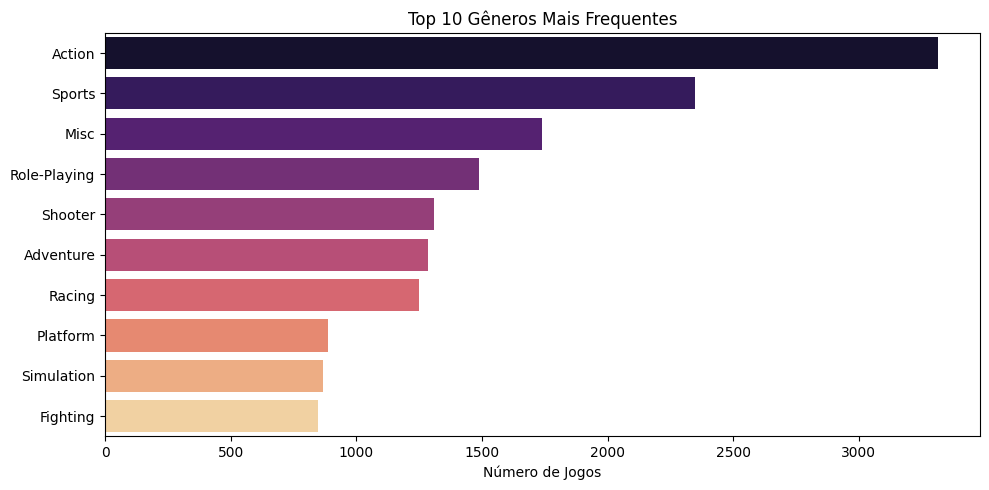

In [ ]:
# Mostrar a lista de gêneros mais frequentes
genres_exploded = dataset['Genre'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [x])
all_genres = [genre for sublist in genres_exploded for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(genres), palette='magma')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Número de Jogos')
plt.tight_layout()
plt.show()


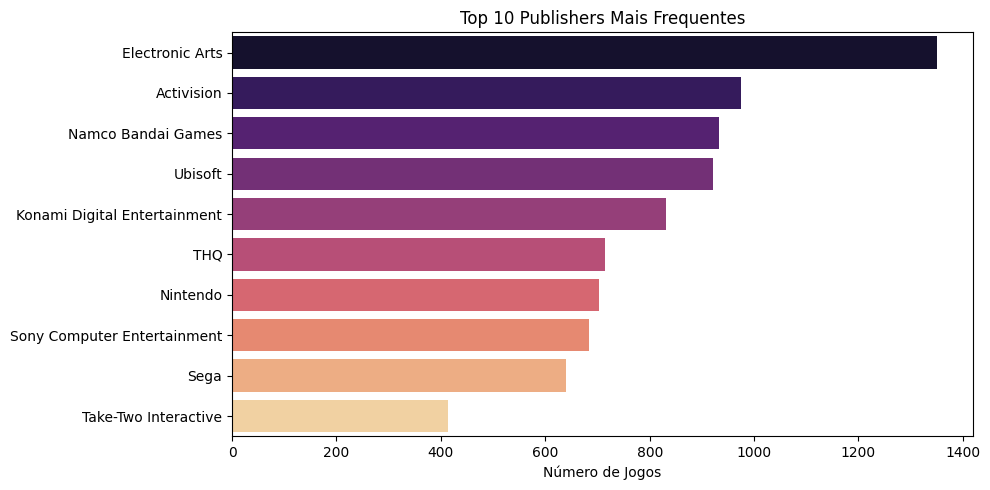

In [ ]:
# Mostrar a lista de publishers mais frequentes
genres_exploded = dataset['Publisher'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [x])
all_genres = [genre for sublist in genres_exploded for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(genres), palette='magma')
plt.title('Top 10 Publishers Mais Frequentes')
plt.xlabel('Número de Jogos')
plt.tight_layout()
plt.show()


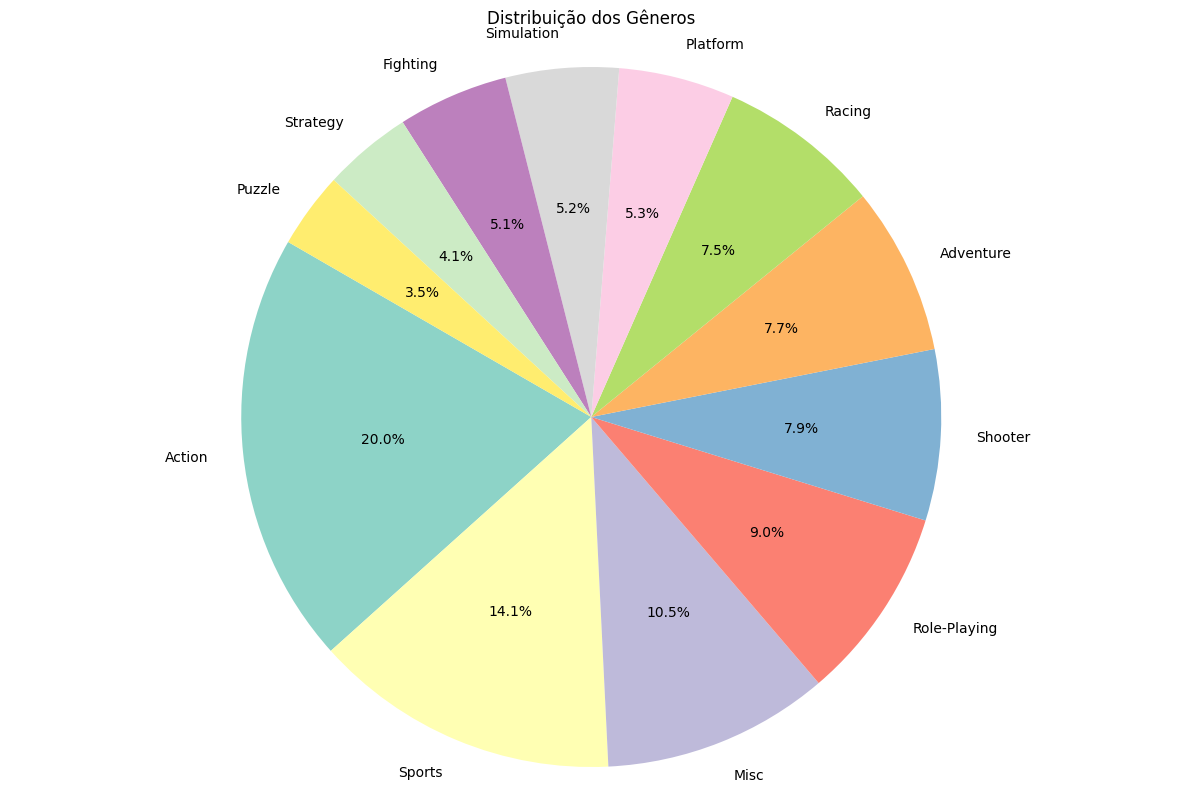

In [ ]:


# Contagem de avaliações
rating_counts = dataset['Genre'].value_counts()

# Cores opcionais
colors = plt.cm.Set3.colors[:len(rating_counts)]

# Gráfico de pizza
plt.figure(figsize=(15, 10))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=150, colors=colors)
plt.title('Distribuição dos Gêneros')
plt.axis('equal')  # Deixa o gráfico como um círculo
plt.show()


In [ ]:


# Criando o OneHotEncoder com sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicando a transformação
encoded_columns = encoder.fit_transform(dataset[["Name", "Platform", "Genre", "Publisher"]])

# Verificando o tipo de dados após a codificação
print(encoded_columns.dtype)


float64


In [ ]:
# Transformando o resultado para um DataFrame e adicionando as colunas codificadas ao DataFrame original




encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["Name", "Platform", "Genre", "Publisher"]))

# Concatenando com as colunas numéricas
X_encoded = pd.concat([encoded_df, dataset.drop(columns=["Name", "Platform", "Genre", "Publisher", "EU_Sales", "Global_Sales", "Rank"])], axis=1)

# Separando a variável dependente (target)
y = dataset["EU_Sales"]

In [ ]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:, 1:7] # Pega as colunas 2 até 7
y = array[:, 7] # Seleciona a variável target 'EU_Sales'
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout sem estratificação


# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'
num_particoes = 3
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada sem estratificação

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (11618, 12119)
Dimensões de X_test: (4980, 12119)
Dimensões de y_train: (11618,)
Dimensões de y_test: (4980,)


In [ ]:
print(X_train.isnull().sum())# Verificar se há valores nulos


Name_'98 Koshien                                  0
Name_.hack//G.U. Vol.1//Rebirth                   0
Name_.hack//G.U. Vol.2//Reminisce                 0
Name_.hack//G.U. Vol.2//Reminisce (jp sales)      0
Name_.hack//G.U. Vol.3//Redemption                0
                                               ... 
Publisher_nan                                     0
Year                                            190
NA_Sales                                          0
JP_Sales                                          0
Other_Sales                                       0
Length: 12119, dtype: int64


In [ ]:
X_train['Year'] = X_train['Year'].fillna(X_train['Year'].mean())  # Preenchimento dos valores nulos com a média


In [ ]:
X_test.isnull().sum()

,0
Name_'98 Koshien,0
Name_.hack//G.U. Vol.1//Rebirth,0
Name_.hack//G.U. Vol.2//Reminisce,0
Name_.hack//G.U. Vol.2//Reminisce (jp sales),0
Name_.hack//G.U. Vol.3//Redemption,0
...,...
Publisher_nan,0
Year,81
NA_Sales,0
JP_Sales,0


In [ ]:
# 1. Calcular a média da coluna 'Year' APENAS no X_train

mean_year_train = X_train['Year'].mean()

# 2. Preenchimento dos NaNs na coluna 'Year' do X_train com essa média
X_train['Year'] = X_train['Year'].fillna(mean_year_train)

# 3. Preenchimento dos NaNs na coluna 'Year' do X_test com a MESMA média calculada do X_train
X_test['Year'] = X_test['Year'].fillna(mean_year_train)

In [ ]:
print(np.any(pd.isna(y_train)))  # Verifique se há NaNs

False


In [ ]:
# Verifique os tipos de dados de X e y
print(y_train.dtype)  # Tipos de dados de X



object


In [ ]:
y_train = np.array(y_train, dtype=np.float64)  # Para valores contínuos (reais)

In [ ]:
print(X_train.dtypes)

Name_'98 Koshien                                float64
Name_.hack//G.U. Vol.1//Rebirth                 float64
Name_.hack//G.U. Vol.2//Reminisce               float64
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    float64
Name_.hack//G.U. Vol.3//Redemption              float64
                                                 ...   
Publisher_nan                                   float64
Year                                            float64
NA_Sales                                        float64
JP_Sales                                        float64
Other_Sales                                     float64
Length: 12119, dtype: object


In [ ]:
# Verificando se há colunas com strings após o One-Hot Encoding
print(X_encoded.dtypes)


Name_'98 Koshien                                float64
Name_.hack//G.U. Vol.1//Rebirth                 float64
Name_.hack//G.U. Vol.2//Reminisce               float64
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    float64
Name_.hack//G.U. Vol.3//Redemption              float64
                                                 ...   
Publisher_nan                                   float64
Year                                            float64
NA_Sales                                        float64
JP_Sales                                        float64
Other_Sales                                     float64
Length: 12119, dtype: object


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
print(X_encoded.dtypes)


Name_'98 Koshien                                float64
Name_.hack//G.U. Vol.1//Rebirth                 float64
Name_.hack//G.U. Vol.2//Reminisce               float64
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    float64
Name_.hack//G.U. Vol.3//Redemption              float64
                                                 ...   
Publisher_nan                                   float64
Year                                            float64
NA_Sales                                        float64
JP_Sales                                        float64
Other_Sales                                     float64
Length: 12119, dtype: object


## Normalização
A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante. Por ser sensível a outliers extremos, como o dataset tem valores máximos muito elevados e a grande maioria dos dados está concentrada em valores mais baixos, a normalização não seria a melhorar escolha para as colunas de vendas, já que iria comprimir muito a informação contida nas vendas mais baixas, diminuindo a variância entre elas, fazendo com que os outliers predominassem a maior parte, o que seria prejudicial para algoritmos que esperam uma dispersão mais uniforme dos dados.    

##Padronização
A padronização transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais, e é frequentemente preferida quando a distribuição dos dados se aproxima de uma distribuição normal.A padronização foi utilizada pois se adequa ás características do meu dataset, principalmente pela presença de outliers nas colunas de vendas. Essa técnica de pré-processamento é menos sensível a outliers que não comprimem tanto os dados, como acontece na normalização.Contudo, os outliers ainda influenciam a média e o desvio padrão.

In [ ]:


# Padronizando as variáveis independentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exibindo os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Padronizados X_train : \n\n", X_train_scaled)
print("\nDados Padronizados X_test : \n\n", X_test_scaled)

Dados Originais: 

 [[1 'Wii Sports' 'Wii' ... 3.77 8.46 82.74]
 [2 'Super Mario Bros.' 'NES' ... 6.81 0.77 40.24]
 [3 'Mario Kart Wii' 'Wii' ... 3.79 3.31 35.82]
 ...
 [16598 'SCORE International Baja 1000: The Official Game' 'PS2' ... 0.0
  0.0 0.01]
 [16599 'Know How 2' 'DS' ... 0.0 0.0 0.01]
 [16600 'Spirits & Spells' 'GBA' ... 0.0 0.0 0.01]]

Dados Padronizados X_train : 

 [[-0.00927797 -0.00927797 -0.00927797 ... -0.0441534  -0.24900875
  -0.04746538]
 [-0.00927797 -0.00927797 -0.00927797 ... -0.06826839 -0.21698156
   0.29587446]
 [-0.00927797 -0.00927797 -0.00927797 ... -0.22501585 -0.24900875
  -0.19461103]
 ...
 [-0.00927797 -0.00927797 -0.00927797 ...  0.83604388  0.71180681
   0.19777736]
 [-0.00927797 -0.00927797 -0.00927797 ... -0.10444088 -0.24900875
  -0.09651393]
 [-0.00927797 -0.00927797 -0.00927797 ... -0.26118834 -0.24900875
  -0.19461103]]

Dados Padronizados X_test : 

 [[-9.27797088e-03 -9.27797088e-03 -9.27797088e-03 ... -1.64728364e-01
  -2.49008747e-01 -1.455

In [ ]:
# Limpeza de espaços extras ou caracteres inesperados
dataset['Name'] = dataset['Name'].str.strip()





In [ ]:
# Remover espaços em branco
dataset['Name'] = dataset['Name'].str.replace('/', '', regex=True)

# Substituir vírgulas por ponto
dataset['Name'] = dataset['Name'].str.replace(',', '.')


In [ ]:
dataset['Name'] = dataset['Name'].astype('category')

# Aplicando One-Hot Encoding
df_one_hot = pd.get_dummies(dataset, columns=['Name'])



O SelectKBest foi utilizado para escolher os melhores atributos. Os atributos selecionados foram Name_Wii_Sports, Name_Wii_Sports Resort, Publisher Nintendo, NA_Sales, JP_Sales e Other_Sales

In [ ]:
# 5. SelectKBest
best_var = SelectKBest(score_func=f_regression, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
# O fit é feito no array NumPy, mas ele ainda consegue calcular os scores.
fit = best_var.fit(X_train_scaled, y_train)

# Reduz X para os atributos selecionados
X_train_selected = fit.transform(X_train_scaled)
X_test_selected = fit.transform(X_test_scaled)

# ---
# Resultados
print('\nNúmero original de atributos (após OHE e padronização):', X_train_scaled.shape[1])
print('\nNúmero reduzido de atributos:', X_train_selected.shape[1])

np.set_printoptions(precision=3)
print("\nScores dos Atributos:", fit.scores_)

#  selected_features_names = X_train_scaled.columns[selected_indices]
# X_train_scaled é um array NumPy, não tem .columns.
# Precisamos dos nomes das colunas ANTES da padronização (do X_train_processed)

# Obtém os nomes das colunas de X_train_processed (que é um DataFrame)
all_feature_names = X_train.columns

selected_indices = fit.get_support(indices=True) # Obtém os índices dos atributos selecionados
# uso dos nomes das colunas do DataFrame original (X_train_processed)
selected_features_names = all_feature_names[selected_indices]

print("\nAtributos Selecionados:", selected_features_names.tolist())

# Para manter X_train_selected e X_test_selected como DataFrames
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features_names, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features_names, index=X_test.index)

print(f"\nDimensões de X_train_selected: {X_train_selected.shape}")
print(f"Dimensões de X_test_selected: {X_test_selected.shape}")


Número original de atributos (após OHE e padronização): 12119

Número reduzido de atributos: 6

Scores dos Atributos: [8.936e-03 8.221e-02 1.294e-02 ... 1.701e+04 2.760e+03 1.062e+04]

Atributos Selecionados: ['Name_Wii Sports', 'Name_Wii Sports Resort', 'Publisher_Nintendo', 'NA_Sales', 'JP_Sales', 'Other_Sales']

Dimensões de X_train_selected: (11618, 6)
Dimensões de X_test_selected: (4980, 6)


##Conclusão
A análise e pré-processamento do dataset "Video Game Sales" demonstram a importância de entender a estrutura e as características dos dados antes de qualquer modelagem preditiva. O dataset, apesar de ser rico em informações sobre o mercado de games, apresentou desafios como valores nulos e a presença de outliers extremos nas colunas de vendas, que foram abordados na etapa de pré-processamento.

A análise exploratória revelou tendências de vendas. O pico de vendas globais em 2008-2009 coincidiu com a "Era de Ouro" de consoles como PS3, Xbox 360 e Wii e mostrou o domínio da Nintendo , com a sua forte presença no top de vendas e lançamentos. América do Norte e Europa mostraram uma importância regional como os maiores mercados.Foram identificados gêneros (Sports, Action) e plataformas (PS2, Wii) que consistentemente geram grandes volumes de vendas ou muitos lançamentos, embora com alta dispersão. Foi percebida uma distribuição assimétrica, em que a maioria dos jogos não vende muito, enquanto poucos têm um elevado número de vendas.

As etapas de pré-processamento, incluindo tratamento de valores nulos, One-Hot Encoding, normalização, padronização e seleção de atributos (SelectKBest), foram fundamentais para transformar os dados brutos em um formato adequado para a futura construção de um modelo de regressão para prever EU_Sales. A alta dimensionalidade introduzida pelo One-Hot Encoding e a natureza assimétrica das vendas foram desafios que exigiram atenção.

## As hipóteses levantadas foram validadas:

Jogos de gêneros populares tendem a ter vendas mais altas? Sim, o boxplot e os top 10 gêneros mostram que, embora a maioria dos jogos venda pouco, gêneros populares como Sports, Platform e Racing produzem os maiores outliers de vendas globais.

Plataformas com maior base de usuários podem ter jogos com vendas acumuladas mais expressivas? Sim, plataformas como PS2, X360 e Wii com uma grande base de usuários demonstram o maior volume de vendas globais.

Determinadas editoras (publishers) possuem um histórico de maior sucesso e volume de vendas? Sim, editoras como Electronic Arts, Activision e Nintendo se destacam tanto em volume de lançamentos quanto na presença de jogos de alto sucesso.

As vendas variam significativamente entre as regiões? Sim, o gráfico de barras empilhadas e as médias regionais confirmam diferenças, com NA e EU sendo os maiores mercados.

A indústria de videogames tem crescido e mudado ao longo dos anos e essa evolução refletiu no padrão de vendas? Sim, o gráfico de vendas por ano mostra um crescimento notável a partir dos anos 2000, com um pico em 2008-2009, seguido por uma queda no número de vendas.

Este MVP estabelece uma base sólida para a próxima fase, que seria a construção e avaliação de modelos de Machine Learning para a previsão de vendas na Europa.